In [1]:
import numpy as np
import pygrgl
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/adityasyam/grg_pheno_sim') 

from grg_pheno_sim.phenotype import sim_phenotypes
from grg_pheno_sim.model import grg_causal_mutation_model


The following command only serves the purpose of converting the VCF zip file into a GRG that will be used for the phenotype simulation.

In [2]:
%%script bash --out /dev/null
if [ ! -f test-200-samples.grg ]; then
  grg construct --no-maf-flip -p 10 -t 2 ../data/test-200-samples.vcf.gz --out-file test-200-samples.grg
fi

This notebook contains demos where we combine all the stages of the phenotype simulator together to obtain final phenotypes in one go. The first demo uses the normal model for univariate simulation.

In [3]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory

model_type = "normal"
mean = 0
var = 1

model = grg_causal_mutation_model(model_type, mean=mean, var=var)

num_causal = 1000

random_seed = 1

normalize_genetic_values_before_noise = True

noise_heritability = 0.33

effect_output_required = True #saves the effect sizes data for each mutation node in a .par file

effect_path = 'univariate_sample_effect_sizes.par'

standardized_output = True

output_path = 'normal_pheno.phen' #define the path to be saved at, this output is saved in the file of this name in the same directory

header=True #set header parameter to true if column names are expected in output file

phenotypes = sim_phenotypes(grg_1, model, num_causal, random_seed, normalize_genetic_values_before_noise=normalize_genetic_values_before_noise, noise_heritability=noise_heritability, save_effect_output=effect_output_required, effect_path=effect_path, standardized_output=standardized_output, path=output_path, header=header)


The initial effect sizes are 
     mutation_id  effect_size  causal_mutation_id
0             20    -1.810258                   0
1             28     1.151768                   0
2             62     1.681257                   0
3             76     2.346698                   0
4            119    -0.286668                   0
..           ...          ...                 ...
995        10862    -0.221163                   0
996        10874    -1.136983                   0
997        10879    -0.966133                   0
998        10883    -1.402602                   0
999        10889    -0.483777                   0

[1000 rows x 3 columns]
The genetic values of the individuals are 
     individual_id  genetic_value  causal_mutation_id
0                0     -16.501664                   0
1                1      -2.454348                   0
2                2     -17.303803                   0
3                3       6.641214                   0
4                4      -8.71021

In [4]:
phenotypes

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.237835,0.136026,-0.101809
1,0,1,0.434666,0.629787,1.064453
2,0,2,-0.276237,-0.511218,-0.787455
3,0,3,0.870106,-0.398657,0.471450
4,0,4,0.135173,-0.882453,-0.747280
...,...,...,...,...,...
195,0,195,1.152337,-1.133692,0.018645
196,0,196,1.344439,-0.123253,1.221186
197,0,197,0.813731,1.008856,1.822587
198,0,198,0.520387,0.706909,1.227296


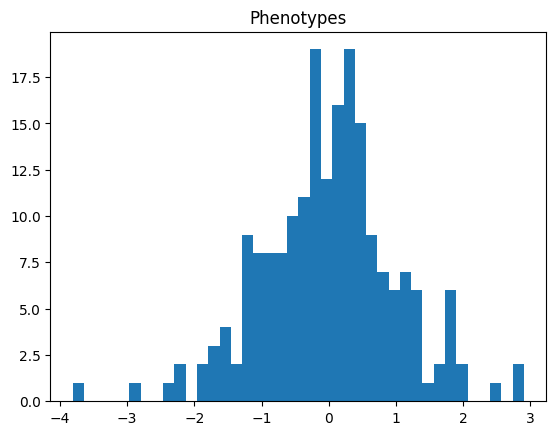

Mean of phenotypes: 8.881784197001253e-18
Standard deviation of phenotypes: 1.0


In [5]:

plt.hist(phenotypes["phenotype"], bins=40)
plt.title("Phenotypes")
plt.show()
print("Mean of phenotypes: " + str(phenotypes['phenotype'].mean()))
print("Standard deviation of phenotypes: " + str(phenotypes['phenotype'].std()))

The second demo uses the multivariate normal for multivariate simulation.

In [6]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory

model_type = "multivariate normal"
means = np.zeros(2)
cov = np.array([[1, 0.25], [0.25, 1]])

model = grg_causal_mutation_model(model_type, mean=means, cov=cov)

num_causal = 10000

random_seed = 1

h2 = [0.4789, 0.5]

effect_output_required = True #saves the effect sizes data for each mutation node in a .par file

effect_path = 'multi_sample_effect_sizes.par'

standardized_output=True

output_path = 'multi_normal_pheno.phen' #define the path you want it to be saved at, file of this name can be found in the same directory

phenotypes_multi_normal = sim_phenotypes(grg_1, model, num_causal, random_seed, noise_heritability=h2, save_effect_output=effect_output_required, effect_path=effect_path, standardized_output=standardized_output, path=output_path)



The initial effect sizes are 
       mutation_id  effect_size  causal_mutation_id
0                0     0.519955                   0
1                0    -0.835345                   1
2                1    -0.132988                   0
3                1     0.588967                   1
4                2    -1.013731                   0
...            ...          ...                 ...
19995        10890    -1.440376                   1
19996        10891    -0.564984                   0
19997        10891     1.015028                   1
19998        10892    -0.251851                   0
19999        10892    -0.227234                   1

[20000 rows x 3 columns]
The genetic values of the individuals are 
     individual_id  genetic_value  causal_mutation_id
0                0       1.158837                   0
1                0      -3.663374                   1
2                1      27.248589                   0
3                1      14.443919                   1
4      

In [7]:
phenotypes_multi_normal

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.430514,-1.137214,-1.567728
1,1,0,-0.039295,1.432802,1.393507
2,0,1,0.074117,0.652603,0.726719
3,1,1,0.337616,0.205491,0.543107
4,0,2,0.722423,-0.065830,0.656593
...,...,...,...,...,...
395,1,197,-1.090510,-0.552209,-1.642718
396,0,198,0.392581,-0.362432,0.030149
397,1,198,-0.182415,0.974452,0.792038
398,0,199,0.162409,-0.479337,-0.316928


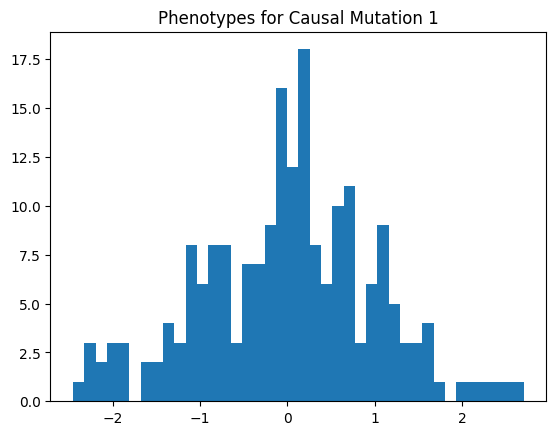

Mean of phenotypes: -5.329070518200751e-17
Standard deviation of phenotypes: 1.0


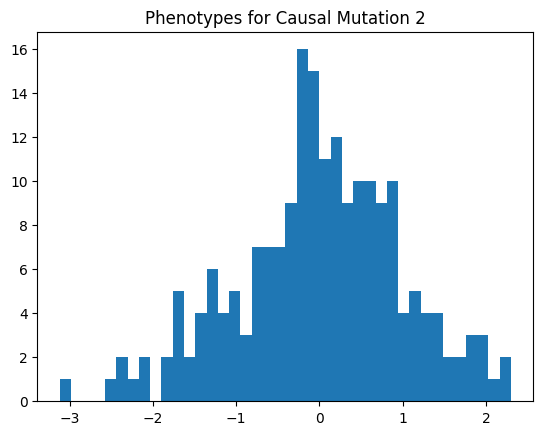

Mean of phenotypes: 8.881784197001253e-18
Standard deviation of phenotypes: 1.0


In [8]:
df_dict_test = {k: v.sort_values('individual_id') for k, v in phenotypes_multi_normal.groupby('causal_mutation_id')}

num = len(df_dict_test)

for i in range(num):
  temp_df = df_dict_test[i]
  plt.hist(temp_df["phenotype"], bins=40)
  plt.title("Phenotypes for Causal Mutation " + str(i+1))
  plt.show()
  print("Mean of phenotypes: " + str(temp_df['phenotype'].mean()))
  print("Standard deviation of phenotypes: " + str(temp_df['phenotype'].std()))

In [9]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory

model_type = "multivariate normal"
means = np.zeros(2)
cov = np.array([[1, 0.33], [0.33, 1]])

model = grg_causal_mutation_model(model_type, mean=means, cov=cov)

num_causal = 10000

random_seed = 1

mean = np.array([0,0])
user_cov = np.array([[1, 0.25], [0.25, 1]])

#heritability feature not used, user-defined noise simulated instead

#by default, a standardized version of the phenotype output will not be saved

phenotypes_multi_normal_non_h2 = sim_phenotypes(grg_1, model, num_causal, random_seed, user_mean=mean, user_cov=user_cov, normalize_genetic_values_after=True)



The initial effect sizes are 
       mutation_id  effect_size  causal_mutation_id
0                0     0.477827                   0
1                0    -0.803153                   1
2                1    -0.106011                   0
3                1     0.576354                   1
4                2    -0.954482                   0
...            ...          ...                 ...
19995        10890    -1.462889                   1
19996        10891    -0.514574                   0
19997        10891     0.978795                   1
19998        10892    -0.258722                   0
19999        10892    -0.235455                   1

[20000 rows x 3 columns]
The genetic values of the individuals are 
     individual_id  genetic_value  causal_mutation_id
0                0       0.987169                   0
1                0      -3.570608                   1
2                1      27.554240                   0
3                1      15.451738                   1
4      

In [10]:
phenotypes_multi_normal_non_h2

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.624948,-0.000917,-0.625865
1,1,0,-0.081346,-0.036988,-0.118334
2,0,1,0.127011,-0.055928,0.071084
3,1,1,0.466089,-0.002231,0.463858
4,0,2,1.020983,-0.025444,0.995539
...,...,...,...,...,...
395,1,197,-1.516219,-0.030328,-1.546546
396,0,198,0.557071,0.013212,0.570283
397,1,198,-0.224040,-0.006733,-0.230773
398,0,199,0.268247,-0.011162,0.257085
